In [23]:
import pandas as pd
pd.set_option('display.max_columns', None)
from plotnine import*
import plotly.express as px


import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

%reload_ext rpy2.ipython

In [24]:
df = pd.read_csv('/Users/mac/Library/Containers/com.microsoft.Excel/Data/Downloads/teachers_files.csv - Sheet1.csv', sep='\t')
df = pd.read_csv('/Users/mac/Library/Containers/com.microsoft.Excel/Data/Downloads/teachers_files.csv - Sheet1.csv', skiprows=0)
df.head()


,field_of_study,1970-71,1975-76,1980-81,1985-86,1990-91,1995-96,2000-01,2005-06,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18,2018-19,2019-20,Total
0,Agriculture and natural resources,"12,674","19,402","21,886","17,191","13,363","21,757","23,766","23,497","29,203","31,629","34,304","35,953","37,028","37,827","38,782","40,334","41,373","41,848","521,817"
1,Architecture and related services,"5,570","9,146","9,455","9,119","9,781","8,352","8,480","9,515","9,831","9,727","9,757","9,149","9,090","8,825","8,579","8,464","8,806","9,045","160,691"
2,"Area, ethnic, cultural, gender, and group studies","2,579","3,577","2,887","3,021","4,776","5,633","6,160","7,878","8,955","9,228","8,850","8,275","7,783","7,840","7,720","7,717","7,733","7,767","118,379"
3,Biological and biomedical sciences,"35,705","54,154","43,078","38,395","39,482","61,014","60,576","70,602","89,984","95,850","100,397","104,657","109,904","113,794","116,768","118,661","121,233","126,590","1,500,844"
4,Business,"115,396","143,171","200,521","236,700","249,165","226,623","263,515","318,043","365,133","367,235","360,887","358,132","363,741","371,690","381,109","386,240","390,490","387,851","5,485,642"


In [25]:
df["Total"] = df["Total"].astype(str).str.replace(",", "").astype(float)
sum_by_field = df.groupby("field_of_study")["Total"].sum().sort_values(ascending=False).reset_index()
sum_by_field.head(10)

,field_of_study,Total
0,Business,5485642.0
1,Social sciences and history,2692848.0
2,Health professions and related programs,2636754.0
3,Education,1883604.0
4,Psychology,1610605.0
5,Engineering,1507638.0
6,Biological and biomedical sciences,1500844.0
7,Visual and performing arts,1321822.0
8,"Communication, journalism, and related programs",1225108.0
9,Computer and information sciences and support ...,864397.0


In [26]:
sum_by_field.head(10).to_csv('most_sought_after_courses_in_US.csv')

In [27]:
courses = sum_by_field.head(10)
courses

,field_of_study,Total
0,Business,5485642.0
1,Social sciences and history,2692848.0
2,Health professions and related programs,2636754.0
3,Education,1883604.0
4,Psychology,1610605.0
5,Engineering,1507638.0
6,Biological and biomedical sciences,1500844.0
7,Visual and performing arts,1321822.0
8,"Communication, journalism, and related programs",1225108.0
9,Computer and information sciences and support ...,864397.0


I want to find the percentage of graduates with a bachelors education degree from U.S universities since 1970, from the top ten courses studied in the U.S 

In [28]:
total_sum = sum_by_field.head(10).Total.sum()
total_sum

20729262.0

In [29]:
education_sum = df.loc[df['field_of_study'] == 'Education', 'Total'].values[0]
education_percent = education_sum / total_sum * 100
education_percent

9.086691074675016

In [30]:
edu_data = df[df['field_of_study'].isin(['Education'])]
edu_data

,field_of_study,1970-71,1975-76,1980-81,1985-86,1990-91,1995-96,2000-01,2005-06,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18,2018-19,2019-20,Total
8,Education,"176,307","154,437","108,074","87,147","110,807","105,384","105,458","107,235","104,008","105,656","104,698","98,838","91,596","87,221","85,130","82,599","83,952","85,057",1883604.0


In [31]:
edu_data.to_csv('education_file.csv')

In [32]:
filtered_data = df[df['field_of_study'].isin(['Business', 'Social sciences and history', 'Health professions and related programs', 'Education', 'Psychology', 'Engineering', 'Biological and biomedical sciences', 'Visual and performing arts', 'Communication, journalism, and related programs', 'Computer and information sciences and support', 'Computer and information sciences and support services' ])].sort_values(by='Total', ascending=False).reset_index()
filtered_data

,index,field_of_study,1970-71,1975-76,1980-81,1985-86,1990-91,1995-96,2000-01,2005-06,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18,2018-19,2019-20,Total
0,4,Business,"115,396","143,171","200,521","236,700","249,165","226,623","263,515","318,043","365,133","367,235","360,887","358,132","363,741","371,690","381,109","386,240","390,490","387,851",5485642.0
1,28,Social sciences and history,"155,324","126,396","100,513","93,840","125,107","126,479","128,036","161,468","177,169","178,534","177,767","173,132","166,971","161,211","159,097","159,962","160,678","161,164",2692848.0
2,14,Health professions and related programs,"25,221","53,885","63,665","64,941","59,636","85,755","75,537","91,528","142,890","163,018","180,437","197,949","215,478","228,075","236,931","243,876","250,650","257,282",2636754.0
3,8,Education,"176,307","154,437","108,074","87,147","110,807","105,384","105,458","107,235","104,008","105,656","104,698","98,838","91,596","87,221","85,130","82,599","83,952","85,057",1883604.0
4,26,Psychology,"38,187","50,278","41,068","40,628","58,655","73,416","73,645","88,132","100,906","109,099","114,446","117,312","117,573","117,447","116,859","116,436","116,550","119,968",1610605.0
5,9,Engineering,"45,034","38,733","63,642","77,391","62,448","62,168","58,209","66,841","76,356","81,371","85,987","92,169","97,852","106,789","115,671","121,953","126,692","128,332",1507638.0
6,3,Biological and biomedical sciences,"35,705","54,154","43,078","38,395","39,482","61,014","60,576","70,602","89,984","95,850","100,397","104,657","109,904","113,794","116,768","118,661","121,233","126,590",1500844.0
7,31,Visual and performing arts,"30,394","42,138","40,479","37,241","42,186","49,296","61,148","83,292","93,939","95,806","97,799","97,414","95,840","92,979","91,291","88,507","89,741","92,332",1321822.0
8,5,"Communication, journalism, and related programs","10,324","20,045","29,428","41,666","51,650","47,320","58,013","73,658","83,231","83,771","84,818","87,612","90,658","92,551","93,794","92,289","92,528","91,752",1225108.0
9,7,Computer and information sciences and support ...,"2,388","5,652","15,121","42,337","25,159","24,506","44,142","47,702","43,066","47,406","50,961","55,271","59,586","64,402","71,416","79,597","88,638","97,047",864397.0


In [33]:
filtered_data.to_csv('filtered_data.csv')

Teachers with a bachelors degree in education constitute about 9.1 percent of the fields of study in the US since 1970. The population of graduates with an education degree decreased from 176,307 in 1970 to 85,057 in 2020.

In [34]:
sum_by_field.head()

,field_of_study,Total
0,Business,5485642.0
1,Social sciences and history,2692848.0
2,Health professions and related programs,2636754.0
3,Education,1883604.0
4,Psychology,1610605.0


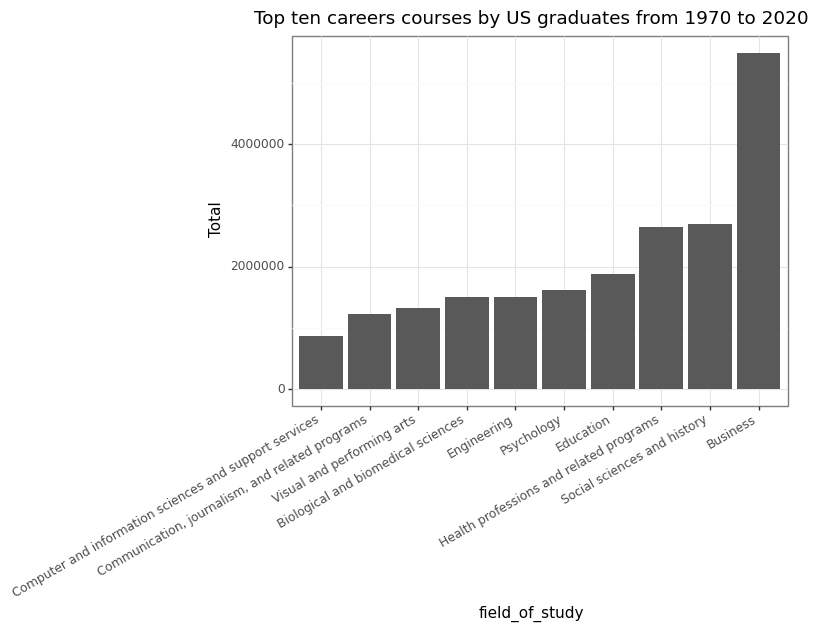

<ggplot: (326337401)>

In [35]:
(
    ggplot(courses)
    + aes(x='reorder(field_of_study, Total)', y='Total')
    + geom_bar(stat='identity')
    + xlab("field_of_study") 
    + ylab("Total") 
    + theme_bw() 
    + ggtitle("Top ten careers courses by US graduates from 1970 to 2020")
    + theme(axis_text_x = element_text(angle = 30, hjust = 1))
)

In [36]:
#df.to_csv('occupations_table.csv', index=False)

In [37]:
new_df = pd.read_csv('/Users/mac/occupations_table1.csv')
new_df.head()

#new_df = new_df.rename(columns=lambda x: x.replace('(','').replace(')','').replace(' ','_'))
#new_df

,Occupation_code,Occupation_title_click_on_the_occupation_title_to_view_its_profile,Level,Employment,Employment_RSE,Percent_of_total_employment,Median_hourly_wage,Mean_hourly_wage,Annual_mean_wage,Mean_wage_RSE
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17-3021,Aerospace Engineering and Operations Technolog...,detail,80.0,0.90%,-7,-8,-8,-8,-8
2,41-3031,"Securities, Commodities, and Financial Service...",detail,110.0,12.70%,-7,-8,-8,-8,-8
3,47-2161,Plasterers and Stucco Masons,detail,490.0,2.90%,-7,-8,-8,-8,-8
4,47-3011,"Helpers--Brickmasons, Blockmasons, Stonemasons...",detail,70.0,2.40%,-7,-8,-8,-8,-8


In [38]:
new_df = new_df.dropna(how='any')
new_df

,Occupation_code,Occupation_title_click_on_the_occupation_title_to_view_its_profile,Level,Employment,Employment_RSE,Percent_of_total_employment,Median_hourly_wage,Mean_hourly_wage,Annual_mean_wage,Mean_wage_RSE
1,17-3021,Aerospace Engineering and Operations Technolog...,detail,80.0,0.90%,-7,-8,-8,-8,-8
2,41-3031,"Securities, Commodities, and Financial Service...",detail,110.0,12.70%,-7,-8,-8,-8,-8
3,47-2161,Plasterers and Stucco Masons,detail,490.0,2.90%,-7,-8,-8,-8,-8
4,47-3011,"Helpers--Brickmasons, Blockmasons, Stonemasons...",detail,70.0,2.40%,-7,-8,-8,-8,-8
5,47-5013,"Service Unit Operators, Oil and Gas",detail,50.0,38.90%,-7,-8,-8,-8,-8
...,...,...,...,...,...,...,...,...,...,...
983,29-1222,"Physicians, Pathologists",detail,960.0,1.90%,-7,$83.15,$87.33,"$181,650",0.80%
984,29-1242,"Orthopedic Surgeons, Except Pediatric",detail,580.0,1.30%,-7,$38.37,$88.55,"$184,180",1.20%
985,29-1217,Neurologists,detail,410.0,0.40%,-7,$46.98,$92.22,"$191,820",0.90%
986,29-1218,Obstetricians and Gynecologists,detail,970.0,2.10%,-7,$57.16,$92.79,"$193,000",1.30%


In [39]:
change_names = new_df.rename(columns={'Occupation_title_click_on_the_occupation_title_to_view_its_profile': 'occupation_title', 'Annual_mean_wage': 'annual_mean_wage'})
change_names

,Occupation_code,occupation_title,Level,Employment,Employment_RSE,Percent_of_total_employment,Median_hourly_wage,Mean_hourly_wage,annual_mean_wage,Mean_wage_RSE
1,17-3021,Aerospace Engineering and Operations Technolog...,detail,80.0,0.90%,-7,-8,-8,-8,-8
2,41-3031,"Securities, Commodities, and Financial Service...",detail,110.0,12.70%,-7,-8,-8,-8,-8
3,47-2161,Plasterers and Stucco Masons,detail,490.0,2.90%,-7,-8,-8,-8,-8
4,47-3011,"Helpers--Brickmasons, Blockmasons, Stonemasons...",detail,70.0,2.40%,-7,-8,-8,-8,-8
5,47-5013,"Service Unit Operators, Oil and Gas",detail,50.0,38.90%,-7,-8,-8,-8,-8
...,...,...,...,...,...,...,...,...,...,...
983,29-1222,"Physicians, Pathologists",detail,960.0,1.90%,-7,$83.15,$87.33,"$181,650",0.80%
984,29-1242,"Orthopedic Surgeons, Except Pediatric",detail,580.0,1.30%,-7,$38.37,$88.55,"$184,180",1.20%
985,29-1217,Neurologists,detail,410.0,0.40%,-7,$46.98,$92.22,"$191,820",0.90%
986,29-1218,Obstetricians and Gynecologists,detail,970.0,2.10%,-7,$57.16,$92.79,"$193,000",1.30%


In [40]:
occupations_state = change_names.groupby(['occupation_title'])['annual_mean_wage'].sum().to_frame()
occupations_state

,annual_mean_wage
occupation_title,
Accountants and Auditors,"$77,280"
Actors,-4
"Actors, Producers, and Directors","$69,340"
Actuaries,"$108,760"
Acupuncturists,"$95,740"
...,...
"Woodworking Machine Setters, Operators, and Tenders","$34,230"
Word Processors and Typists,"$44,010"
Writers and Authors,"$78,870"


In [41]:
occupations_state = change_names.groupby(['occupation_title'])['annual_mean_wage'].sum().sort_values(ascending=False).reset_index()
occupations_state

,occupation_title,annual_mean_wage
0,"Service Unit Operators, Oil and Gas",-8
1,Hoist and Winch Operators,-8
2,Plasterers and Stucco Masons,-8
3,Aerospace Engineering and Operations Technolog...,-8
4,"Helpers--Brickmasons, Blockmasons, Stonemasons...",-8
...,...,...
981,"Computer Occupations, All Other","$100,880"
982,Nuclear Engineers,"$100,650"
983,Mechanical Engineers,"$100,610"
984,Administrative Services and Facilities Managers,"$100,580"


In [42]:
#occupations_state['annual_mean_wage'].str.replace('-', )

occupations_state['annual_mean_wage'] = np.where(occupations_state['annual_mean_wage'].str.contains("-"), np.nan, occupations_state['annual_mean_wage'])
occupations_state

,occupation_title,annual_mean_wage
0,"Service Unit Operators, Oil and Gas",NaN
1,Hoist and Winch Operators,NaN
2,Plasterers and Stucco Masons,NaN
3,Aerospace Engineering and Operations Technolog...,NaN
4,"Helpers--Brickmasons, Blockmasons, Stonemasons...",NaN
...,...,...
981,"Computer Occupations, All Other","$100,880"
982,Nuclear Engineers,"$100,650"
983,Mechanical Engineers,"$100,610"
984,Administrative Services and Facilities Managers,"$100,580"


In [43]:
wage_df = occupations_state.dropna(how='any')
wage_df

,occupation_title,annual_mean_wage
13,Construction Managers,"$99,930"
14,Landscape Architects,"$99,880"
15,"Architects, Except Naval","$99,760"
16,"Architects, Except Landscape and Naval","$99,710"
17,Healthcare Diagnosing or Treating Practitioners,"$99,340"
...,...,...
981,"Computer Occupations, All Other","$100,880"
982,Nuclear Engineers,"$100,650"
983,Mechanical Engineers,"$100,610"
984,Administrative Services and Facilities Managers,"$100,580"


In [44]:
#occupations_state[occupations_state['occupation_title'].str.contains('Elementary', 'Police Officer', 'Operators', 'Social Worker', 'Electrical Engineers', 'Computer Support Specialists', 'Urban and Regional Planners', 'Compliance Officers', 'Physical Therapists')]
wage_df[wage_df['occupation_title'].str.contains('Elementary|Police Officer|Accountant|Civil Engineer|Social Worker|Electrical Engineers|Computer Support Specialists|Urban and Regional Planners|Compliance Officers|Physical Therapists', case=False)]





,occupation_title,annual_mean_wage
39,Civil Engineers,"$94,870"
47,Physical Therapists,"$93,040"
157,Urban and Regional Planners,"$79,840"
178,Accountants and Auditors,"$77,280"
203,Compliance Officers,"$74,850"
250,Police Officers,"$70,870"
263,"Preschool, Elementary, Middle, Secondary, and ...","$69,340"
271,"Elementary School Teachers, Except Special Edu...","$68,950"
274,Elementary and Middle School Teachers,"$68,860"
276,"Social Workers, All Other","$68,800"


In [45]:
#wage_df.to_csv('teach_hub.csv', index=False)
wage_df[wage_df['occupation_title'].str.contains('Elementary|Police Officer|Social Worker|Electrical Engineers|Computer Support Specialists|Urban and Regional Planners|Compliance Officers|Physical Therapists', case=False)].to_csv('hubb_wages.csv', index = False)

In [46]:

occupations_state['cleaned_column'] = np.where(occupations_state['occupation_title'].str.contains('Teachers'), "Teachers", occupations_state['occupation_title'])
occupations_state

#occupations_state['cleaned_column'] = np.where(occupations_state[occupations_state['occupation_title'].str.contains('Teachers')], "Teachers", occupations_state['occupation_title'])




,occupation_title,annual_mean_wage,cleaned_column
0,"Service Unit Operators, Oil and Gas",NaN,"Service Unit Operators, Oil and Gas"
1,Hoist and Winch Operators,NaN,Hoist and Winch Operators
2,Plasterers and Stucco Masons,NaN,Plasterers and Stucco Masons
3,Aerospace Engineering and Operations Technolog...,NaN,Aerospace Engineering and Operations Technolog...
4,"Helpers--Brickmasons, Blockmasons, Stonemasons...",NaN,"Helpers--Brickmasons, Blockmasons, Stonemasons..."
...,...,...,...
981,"Computer Occupations, All Other","$100,880","Computer Occupations, All Other"
982,Nuclear Engineers,"$100,650",Nuclear Engineers
983,Mechanical Engineers,"$100,610",Mechanical Engineers
984,Administrative Services and Facilities Managers,"$100,580",Administrative Services and Facilities Managers


In [47]:
occupations_state[occupations_state['cleaned_column'].str.contains('Teachers')]

,occupation_title,annual_mean_wage,cleaned_column
19,"Biological Science Teachers, Postsecondary","$98,770",Teachers
20,"Physics Teachers, Postsecondary","$98,750",Teachers
21,"Life Sciences Teachers, Postsecondary","$98,270",Teachers
24,"Anthropology and Archeology Teachers, Postseco...","$97,900",Teachers
26,"Family and Consumer Sciences Teachers, Postsec...","$97,300",Teachers
...,...,...,...
922,"Economics Teachers, Postsecondary","$118,450",Teachers
936,"Engineering Teachers, Postsecondary","$113,690",Teachers
945,"Engineering and Architecture Teachers, Postsec...","$111,040",Teachers
960,"Business Teachers, Postsecondary","$107,890",Teachers


In [48]:
df_teach = pd.read_csv("/Users/mac/Library/Containers/com.microsoft.Excel/Data/Downloads/figure-d41-teaching-time.csv")
df_teach.round(1)

,Category,"Upper secondary, general programmes","Lower secondary, general programmes",Primary,Pre-primary
0,Costa Rica,1248.0,1248.0,1170.0,799.5
1,Chile,1015.6,1015.6,1015.6,1015.6
2,United States,965.7,966.4,1004.4,1010.7
3,Scotland,855.0,855.0,855.0,855.0
4,Lithuania,854.4,854.4,830.4,640.0
5,Colombia,844.8,844.8,960.0,768.0
6,Mexico,842.8,1040.0,800.0,532.0
7,Australia,821.2,828.3,878.4,758.2
8,New Zealand,760.0,840.4,921.6,1230.0
9,Latvia,726.0,768.0,640.0,1368.0


In [49]:
df_teach

,Category,"Upper secondary, general programmes","Lower secondary, general programmes",Primary,Pre-primary
0,Costa Rica,1248.00000,1248.00000,1170.00000,799.50000
1,Chile,1015.56000,1015.56000,1015.56000,1015.56000
2,United States,965.67012,966.36312,1004.37480,1010.70900
3,Scotland,855.00000,855.00000,855.00000,855.00000
4,Lithuania,854.40000,854.40000,830.40000,640.00000
5,Colombia,844.80000,844.80000,960.00000,768.00000
6,Mexico,842.80000,1040.00000,800.00000,532.00000
7,Australia,821.20197,828.28620,878.40834,758.20224
8,New Zealand,760.00000,840.40000,921.60000,1230.00000
9,Latvia,726.00000,768.00000,640.00000,1368.00000
